# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# импорт библиотек

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')# прочитали csv-файл

In [3]:
data.info() #основная информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', None)
data.head(20) #вывод датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


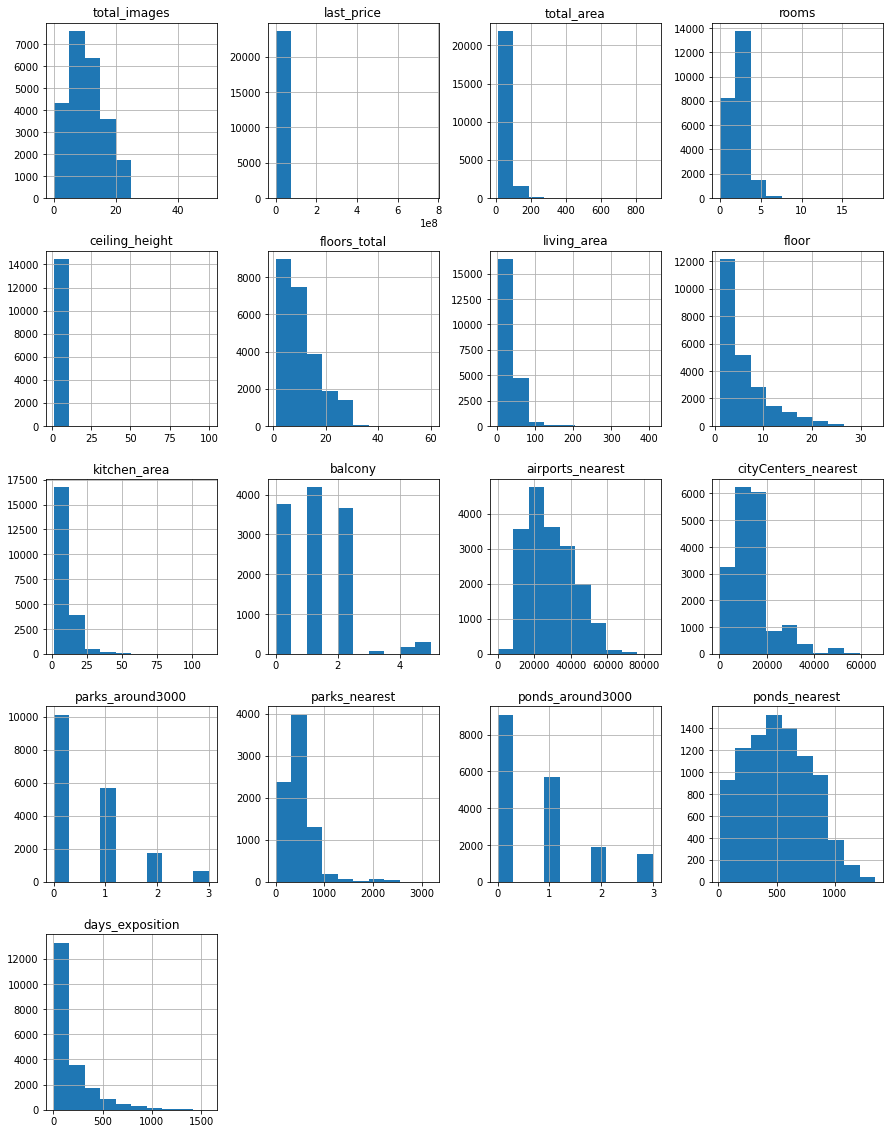

In [5]:
data.hist(figsize=(15, 20)); # гистограммы для всех числовых столбцов

При первом выводе данных можно наблюдать, что неправильно выбраны форматы у столцов first_day_exposition (должна быть дата),balcony,floors_total (должны быть целочисленное).
Большое количество пропусков в ceiling_height, которые нужно заменить на среднее, а пропуски в balcony скорее всего значат, что балкона на объекте нет.

### Выполните предобработку данных

In [6]:
data.isna().sum() #найдены пропуски в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data['first_day_exposition'].unique() #просмотр значений first_day_exposition

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #перевод в формат даты

In [9]:
data['first_day_exposition'].unique() #проверка изменения типа значений first_day_exposition

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
data['balcony'] = data['balcony'].fillna(0) #замена пропусков на 0 в balcony
data['balcony'] = data['balcony'].astype('int') #перевод в формат целого числа

In [11]:
data['ceiling_height'].sort_values(ascending=False) # проверка на аномальные значения

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
         ...  
23687      NaN
23690      NaN
23692      NaN
23695      NaN
23696      NaN
Name: ceiling_height, Length: 23699, dtype: float64

In [12]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10 #замена ошибок ,перенос запятой - потолки не могут быть выше 20 метров

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #замена пропусков медианным значением в ceiling_height

In [14]:
# перевод формата float63 -> int64, замена пропусков
data['floors_total'] = np.floor(pd.to_numeric(data['floors_total'], errors='coerce')).astype('Int64')
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [15]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [16]:
data['days_exposition'].sort_values(ascending=False)

18843    1580
1109     1572
9553     1553
1885     1513
20969    1512
         ... 
23684    <NA>
23685    <NA>
23694    <NA>
23696    <NA>
23698    <NA>
Name: days_exposition, Length: 23699, dtype: Int64

Количество этажей и количество дней от момента, когда было размещено объявление - должны быть целочисленными

In [17]:
# поиск дубликатов
data.duplicated().sum()

0

In [18]:
data['locality_name'].sort_values().unique() # населенные пункты уникальные

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Помимо "е" и "ё" в слове поселок, в списке видим населенные пункты, которые изменили свой статус (деревня и поселок). Произведем замены значений

In [19]:
# перевод в строчные буквы
data['locality_name'] = data['locality_name'].str.lower()

In [20]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок ','деревня ', 'поселок ','городского типа ', 'станции ', 'при железнодорожной станции ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'село ', 'платформа', 'пансионат'
             ], '', regex=True)
) 

In [21]:
data['locality_name'].sort_values().unique()

array([' 69-й километр', ' зеленый бор', 'агалатово', 'александровская',
       'алексеевка', 'аннино', 'аро', 'барышево', 'батово', 'бегуницы',
       'белогорка', 'белоостров', 'бокситогорск', 'большая вруда',
       'большая ижора', 'большая пустомержа', 'большие колпаны',
       'большое рейзино', 'большой сабск', 'бор', 'борисова грива',
       'бугры', 'будогощь', 'ваганово', 'важины', 'вартемяги',
       'вахнова кара', 'вещево', 'виллози', 'вознесенье', 'возрождение',
       'войсковицы', 'войскорово', 'володарское', 'волосово', 'волхов',
       'всеволожск', 'выборг', 'вырица', 'выскатка', 'высокоключевой',
       'высоцк', 'гаврилово', 'гарболово', 'гатчина', 'гладкое',
       'глажево', 'глебычево', 'глинка', 'гончарово', 'горбунки',
       'гостилицы', 'громово', 'дзержинского', 'дружная горка',
       'дружноселье', 'дубровка', 'елизаветино', 'ефимовский',
       'жилгородок', 'жилпоселок', 'житково', 'заводской', 'заклинье',
       'заневка', 'запорожское', 'зеленогорск',

### Добавьте в таблицу новые столбцы

####  Цена одного квадратного метра price_square_meter

In [22]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_square_meter'].mean()

99421.65640364573

#### День недели публикации объявления day_publication

In [23]:
data['day_publication'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления month_publication

In [24]:
data['month_publication'] = data['first_day_exposition'].dt.month 

#### Год публикации объявления year_publication

In [25]:
data['year_publication'] = data['first_day_exposition'].dt.year 

#### Тип этажа квартиры type_apartment_floor

In [26]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['type_apartment_floor'] = data.apply(floor, axis=1) 

#### Расстояние до центра города в километрах distance_city_center

In [27]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0)

### Проведите исследовательский анализ данных

Факторы зависимости стоимости объекта:

#### Общая площадь

In [28]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [29]:
data['total_area'].sort_values()

19904     12.0
17961     13.0
19546     13.0
19807     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23699, dtype: float64

Диаграмма размаха общей площади


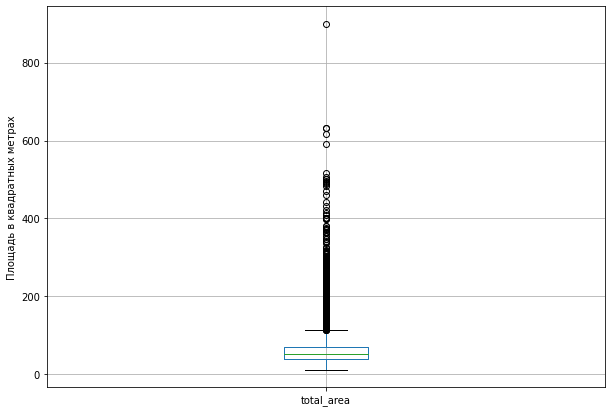

In [30]:
print('Диаграмма размаха общей площади')
data.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

Большинство значений в диапазоне до 200, покажем данную выборку:

Диаграмма размаха общей площади


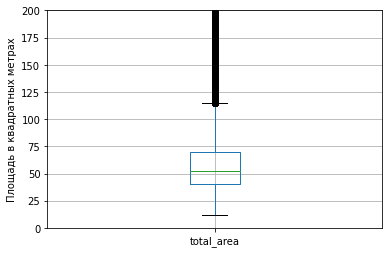

In [31]:
print('Диаграмма размаха общей площади')
plt.ylim(0, 200)
data.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

"Усы" диаграммы размаха простираются от 12 кв. м (минимальное значение) до 120 кв.м.
Большее количество значений в диапазоне от 40 до 69 кв. м, в среднем 52 кв. м.
Требуется удалить выбросы - 12 кв. м (слишком малая площадь) и больше 200 кв. м (таких объявлений мало)

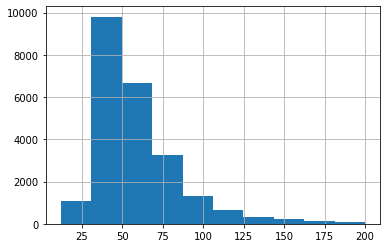

In [32]:
data.query('total_area >= 12 and total_area <= 200')['total_area'].hist()
plt.show()

In [33]:
new_data = data.query('total_area >= 12 and total_area <= 200')

In [34]:
new_data.shape[0] / data.shape[0]

0.9904215367737035

Удалено менее 1% данных,можно произвести замену данных.

In [35]:
data = new_data

Зависимость цены от общей площади:

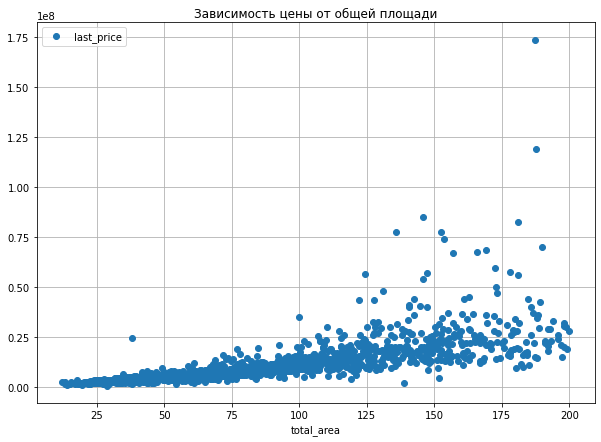

In [36]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 7))
)
plt.title('Зависимость цены от общей площади')
plt.show()

In [37]:
data['total_area'].corr(data['last_price'])

0.6592113703715996

Зависимость цены от общей площади наблюдается.Больше площадь - больше цена.

#### Жилая площадь

In [38]:
data['living_area'].describe()

count    21597.000000
mean        33.253191
std         17.366872
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Диаграмма размаха жилой площади


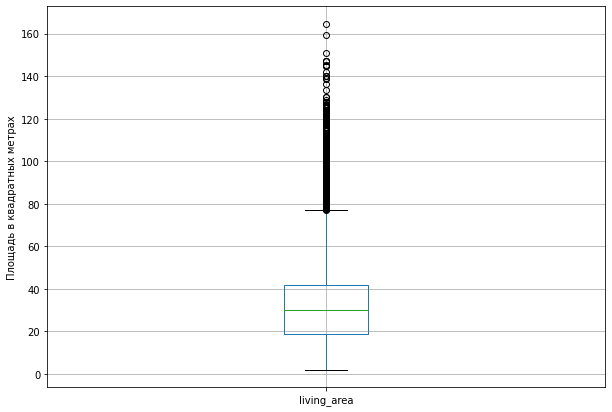

In [39]:
print('Диаграмма размаха жилой площади')
data.boxplot(column=['living_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

"Усы" диаграммы размаха простираются от 2 кв. м (минимальное значение) до 80 кв.м.
Большее количество значений в диапазоне от 18 до 42 кв. м, в среднем 30 кв. м.
Минимальное значение жилой площади в 2 кв. м кажется сомнительным, но в остальным данным легко можно поверить. 
За пределами "усов" данные считаем выбросами

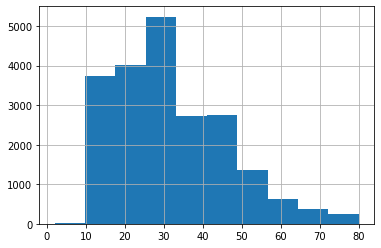

In [40]:
data.query('living_area >= 2 and living_area <= 80')['living_area'].hist()
plt.show()

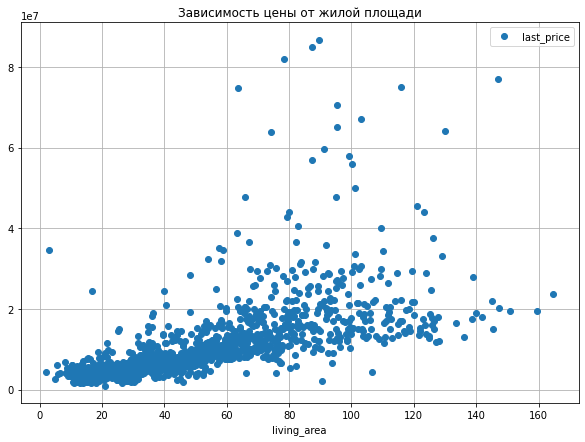

In [41]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 7))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

In [42]:
data['living_area'].corr(data['last_price'])

0.541958789828844

Зависимость цены от жилой площади также наблюдается, что логично, учитывая зависимость от общей площади.

#### Площадь кухни

In [43]:
data['kitchen_area'].describe()

count    21223.000000
mean        10.386712
std          5.371820
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

Диаграмма размаха для кухни


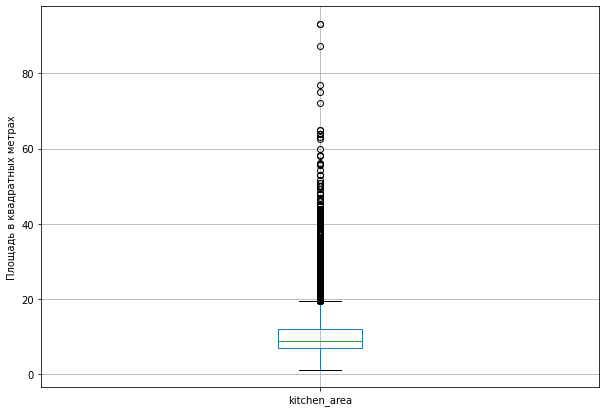

In [44]:
print('Диаграмма размаха для кухни')
data.boxplot(column=['kitchen_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

"Усы" диаграммы размаха простираются от 1 кв. м (минимальное значение) до 19 кв.м.
Большее количество значений в диапазоне от 7 до 12 кв. м, в среднем 9 кв. м.
Минимальное значение жилой площади в 1 кв. м кажется преуменьшенным, но бывают помещения без кухни/студии с скрытой складной кухней.Поэтому будем считать данные актуальными.

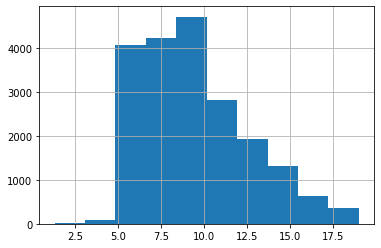

In [45]:
data.query('kitchen_area >= 1 and kitchen_area <= 19')['kitchen_area'].hist()
plt.show()

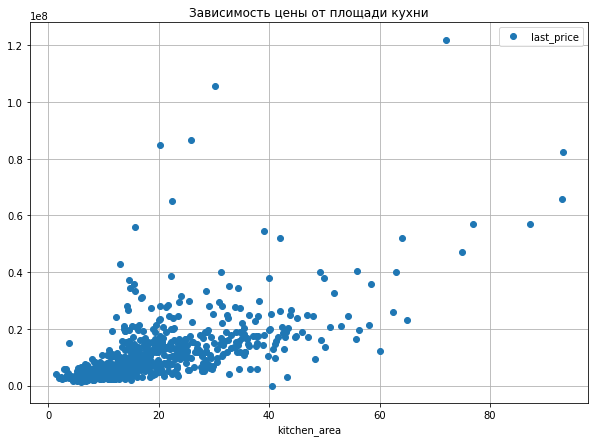

In [46]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 7))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

In [47]:
data['kitchen_area'].corr(data['last_price'])

0.5188912637719892

Зависимость цены от кухни также наблюдается, что логично, учитывая зависимость от общей площади.

#### Цена объекта last_price

In [48]:
data['last_price'].describe()

count    2.347200e+04
mean     6.026304e+06
std      6.237847e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [49]:
data['last_price'].astype('int')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23472, dtype: int64

Диаграмма размаха для цены


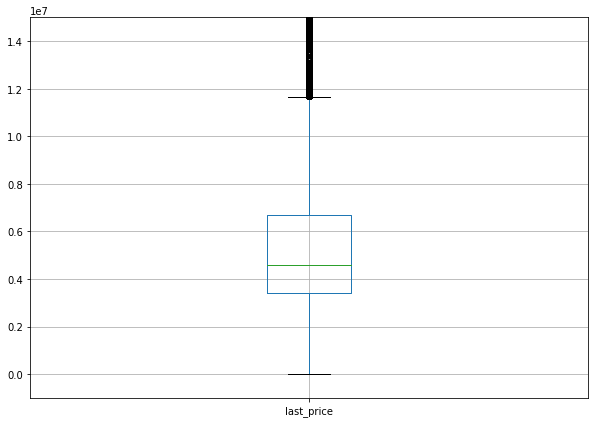

In [50]:
print('Диаграмма размаха для цены')
data.boxplot(column=['last_price'], figsize=(10,7), grid=True)
plt.ylim(-1e+06, 1.5e+07)
plt.show()

Минимальное значение равно 12 190 при медианном значении 4,65 млн. Странное значение, скорее всего выброс.
Верхнее  ограничение - 12 000 000 - такие цены есть.

In [51]:
cheap_data = data.query('last_price < 4e+5')
cheap_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,type_apartment_floor,distance_city_center
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,111.83,2,3,2019,последний,9.0


In [52]:
expensive_data = data.query('last_price > 1.2e+7')

In [53]:
expensive_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,type_apartment_floor,distance_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37,3,3,2019,другой,16.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой,7.0
19,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,False,False,12.0,0,санкт-петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97,117355.37,2,1,2019,другой,13.0
35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.0,4,NaN,False,False,17.0,0,санкт-петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644,104026.85,0,6,2017,другой,4.0
42,13,22000000.0,161.8,2015-07-08,4,2.80,4,80.9,2,False,False,False,17.6,5,петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987,135970.33,2,7,2015,другой,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,7,12100000.0,88.0,2017-07-07,3,2.65,10,NaN,5,NaN,False,False,14.0,0,санкт-петербург,37412.0,8370.0,1.0,392.0,2.0,359.0,200,137500.00,4,7,2017,другой,8.0
23590,0,21187872.0,123.3,2017-04-25,3,2.65,9,50.4,18,NaN,False,False,23.6,0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104,171840.00,1,4,2017,другой,5.0
23608,22,14000000.0,80.0,2017-11-10,3,2.65,11,44.1,6,NaN,False,False,11.0,2,санкт-петербург,11943.0,11710.0,1.0,518.0,1.0,232.0,19,175000.00,4,11,2017,другой,12.0
23631,17,14799000.0,104.0,2018-11-18,3,3.10,4,66.0,2,NaN,False,False,14.0,1,санкт-петербург,39047.0,13944.0,0.0,NaN,1.0,553.0,90,142298.08,6,11,2018,другой,14.0


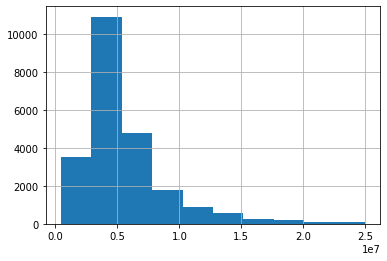

In [54]:
data.query('last_price >= 4.e+5 and last_price <= 2.5e+7')['last_price'].hist()
plt.show()

Цена квартиры не может быть меньше 450000 В Петербурге и области, аномально большие значения(больше 20000000) тоже выбиваются из выборки. Удалим такие  данные:

In [55]:
new_data = data.query('last_price >= 4.e+5 and last_price <= 2e+7')

In [56]:
new_data.shape[0] / data.shape[0]

0.9777181322426721

Менее 4% данных исключается, так что на выборку это не повлияет.

In [57]:
data = new_data

#### Количество комнат

In [58]:
data['rooms'].describe()

count    22949.00000
mean         2.00353
std          0.97065
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max         11.00000
Name: rooms, dtype: float64

In [59]:
data['rooms'].sort_values()

11035     0
3458      0
3874      0
4437      0
10008     0
         ..
855       7
23555     7
2039      7
8758      8
648      11
Name: rooms, Length: 22949, dtype: int64

Диаграмма размаха для количества комнат


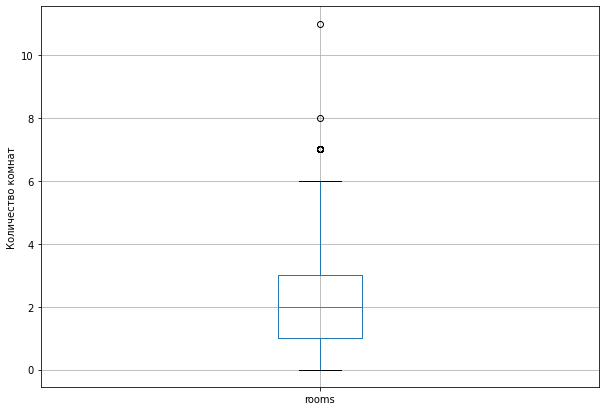

In [60]:
print('Диаграмма размаха для количества комнат')
data.boxplot(column=['rooms'], figsize=(10,7), grid=True)
plt.ylabel('Количество комнат')
plt.show()

Нижний "ус" упирается в 0, но 0 комнат быть не может, ошибка в данных. Возьмем значения комнат >=1.
Верхняя граница - 6 комнат.
Большая часть значений от 2 до 3 комнат. Квартиры с количеством комнат больше 6 бывают, но их очень мало, так что из выборки удалим аномальные данные.

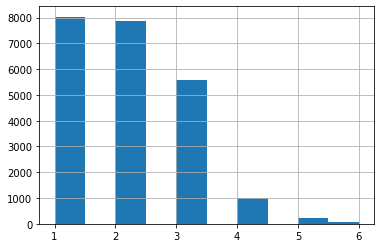

In [61]:
data.query('rooms >= 1 and rooms <= 6')['rooms'].hist()
plt.show()

Удалим из выборки выбросы:

In [62]:
new_data = data.query('rooms >= 1 and rooms <= 6')

In [63]:
new_data.shape[0] / data.shape[0]

0.9908056995947536

 Удаляется менее 3 % данных, так что проводим сокращение данных.

In [64]:
data = new_data

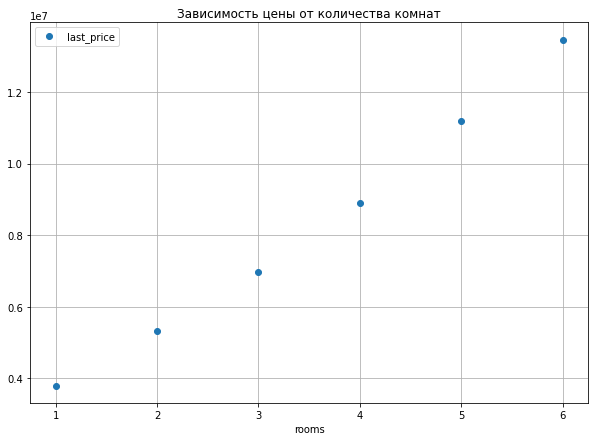

In [65]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 7))
)
plt.title('Зависимость цены от количества комнат')
plt.show()

In [66]:
data['rooms'].corr(data['last_price'])

0.4959763666183671

Зависимость между ценой квартиры и количеством комнат слабая.

#### Высота потолков ceiling_height

In [67]:
data['ceiling_height'].describe()

count    22738.000000
mean         2.687562
std          0.236825
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Диаграмма размаха для высоты потолка


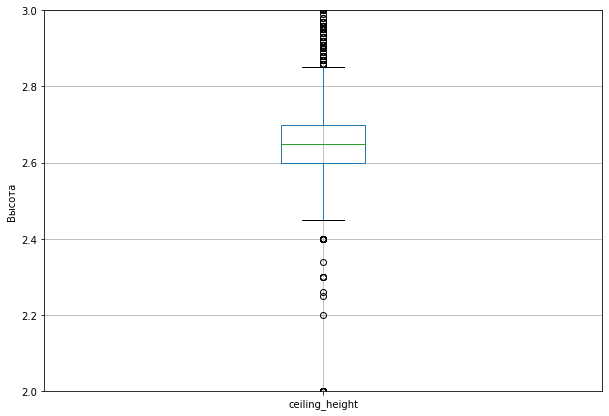

In [68]:
print('Диаграмма размаха для высоты потолка')
data.boxplot(column=['ceiling_height'], figsize=(10,7), grid=True)
plt.ylabel('Высота')
plt.ylim(2, 3)
plt.show()

Значения в основном от 2 до 3 метров, что соответствует действительности. Значения 6-7 метров еще могут быть реальностью при 2-х уровнях квартиры, но значения более 7 метров считаем выбросами и исключаем.

In [69]:
new_data = data.drop(data[data.ceiling_height > 7].index)

In [70]:
new_data.shape[0] / data.shape[0]

0.9996921453074149

Исключено менее 1% данных, что менее 10%, значит имеем право отбросить ненужное - на общие тенденции влияет не сильно:

In [71]:
data = new_data

#### Этаж, на котором расположена квартира и тип этажа квартиры

In [72]:
data['floor'].describe()

count    22731.000000
mean         5.874841
std          4.883360
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Диаграмма размаха для этажа объекта


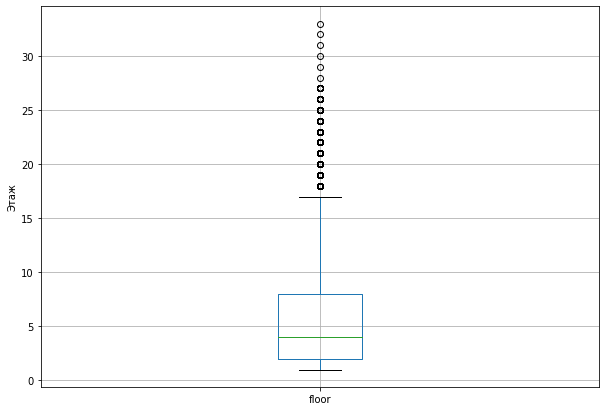

In [73]:
print('Диаграмма размаха для этажа объекта')
data.boxplot(column=['floor'], figsize=(10,7), grid=True)
plt.ylabel('Этаж')
plt.show()

"Усы" диаграммы размаха простираются от 1 (минимальное значение) до 17.
Большее количество значений в диапазоне от 2 до 8, в среднем 4.
Данные опасений не вызывают.

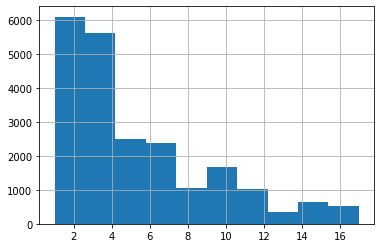

In [74]:
data.query('floor >= 1 and floor <= 17')['floor'].hist()
plt.show()

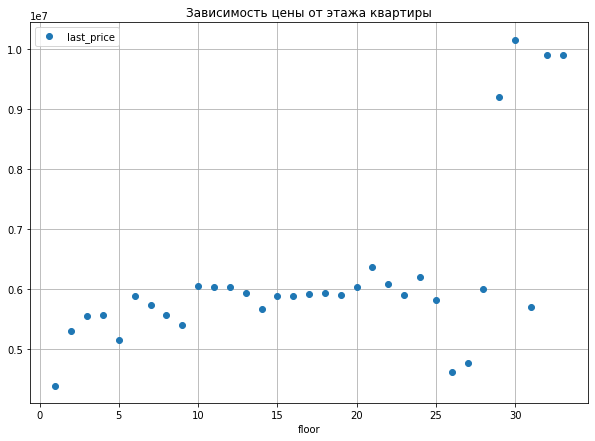

In [75]:
(
    data.pivot_table(index='floor', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 7))
)
plt.title('Зависимость цены от этажа квартиры')
plt.show()

In [76]:
data['floor'].corr(data['last_price'])

0.09668518709945098

Четкой зависимости между ценой квартиры и этажом, на котором находится квартира, не наблюдается.

Если рассмотреть по типам этажа квартиры:

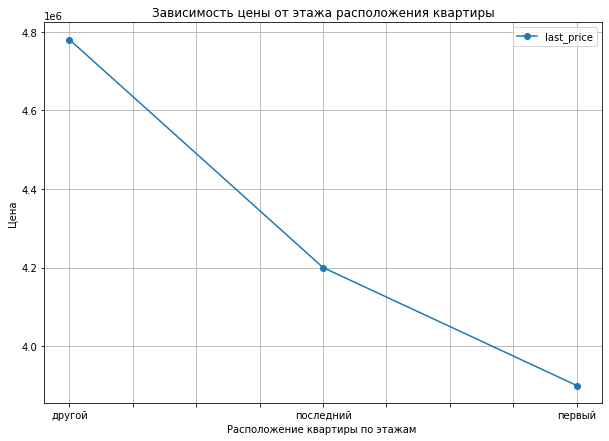

In [77]:
(
    data.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(10, 7), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()

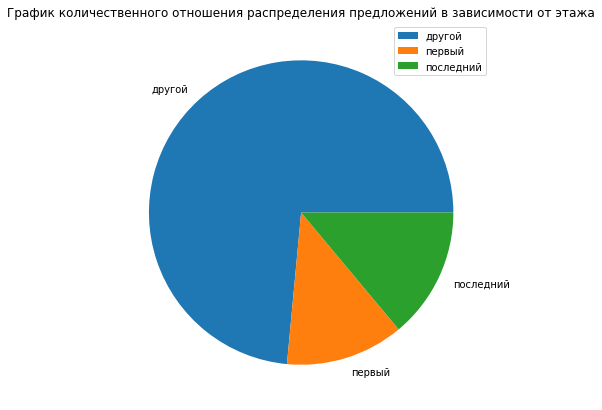

In [78]:
data.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='График количественного отношения распределения предложений в зависимости от этажа')

plt.show()

Квартиры на первом и последних этажах не пользуются большим спросом в отличие от остальных.

#### Расстояние до центра города в метрах city_centers_nearest

In [79]:
data['city_centers_nearest'].describe()

count    17310.000000
mean     14521.585326
std       8591.034987
min        208.000000
25%       9850.000000
50%      13279.000000
75%      16464.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Диаграмма размаха для расстояния от центра


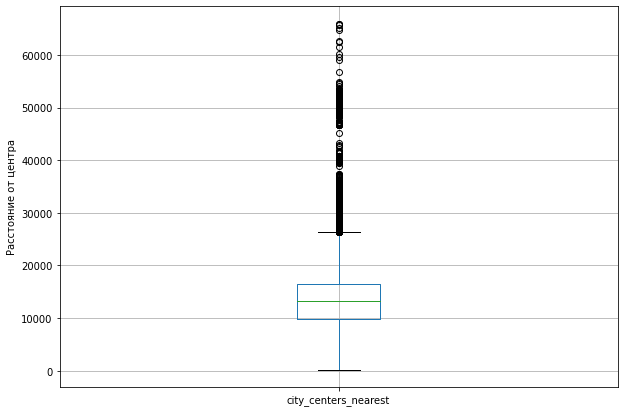

In [80]:
print('Диаграмма размаха для расстояния от центра')
data.boxplot(column=['city_centers_nearest'], figsize=(10,7), grid=True)
plt.ylabel('Расстояние от центра')
plt.show()

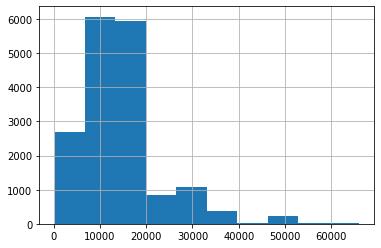

In [81]:
data['city_centers_nearest'].hist()
plt.show()

Больше всего квартир на удалении 9000-16000 от центра.

#### Расстояние до ближайшего парка parks_nearest

In [82]:
data['parks_nearest'].describe()

count    7508.000000
mean      493.515051
std       342.312803
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Диаграмма размаха для расстояния от парков


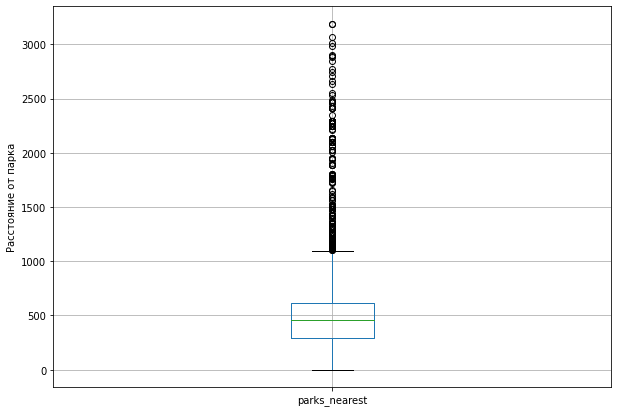

In [83]:
print('Диаграмма размаха для расстояния от парков')
data.boxplot(column=['parks_nearest'], figsize=(10,7), grid=True)
plt.ylabel('Расстояние от парка')
plt.show()

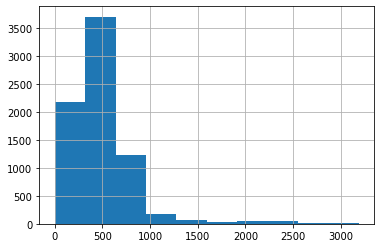

In [84]:
data['parks_nearest'].hist()
plt.show()

Большинство квартир на удалении 500 от парков. Минимальное значение -1, но это похоже на ошибку 

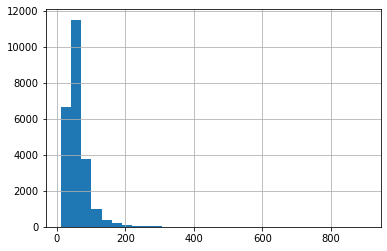

In [85]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

#### Время продаж

In [86]:
data['days_exposition'].describe()

count    19775.000000
mean       178.290619
std        216.537597
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Диаграмма размаха для времени продажи


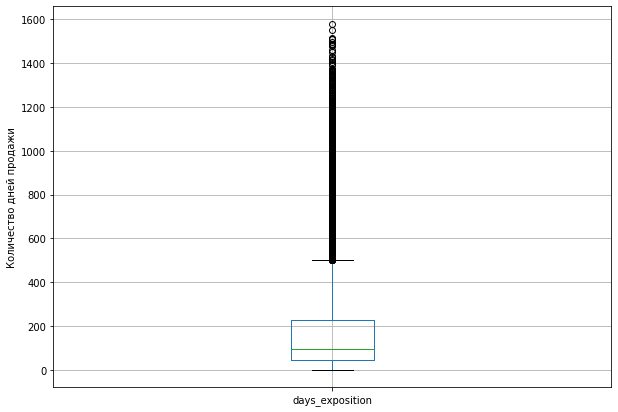

In [87]:
print('Диаграмма размаха для времени продажи')
data.boxplot(column=['days_exposition'], figsize=(10,7), grid=True)
plt.ylabel('Количество дней продажи')
plt.show()

"Усы" диаграммы размаха простираются от 1 (минимальное значение) до 430.
Большее количество значений в диапазоне от 45 до 200, в среднем 95.
На первый взгляд все в порядке, квартира может продаться и за 1 день, и за 400, дело случая.
Получается, быстрой можно считать продажу до 50 дней, долгими - более 200. Около 100 дней - самый частый случай

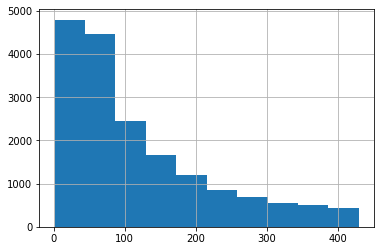

In [88]:
data.query('days_exposition >= 1 and days_exposition <= 430')['days_exposition'].hist()
plt.show()

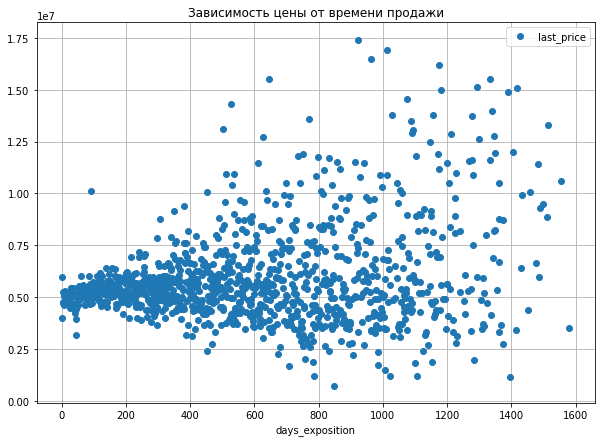

In [89]:
(
    data.pivot_table(index='days_exposition', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 7))
)
plt.title('Зависимость цены от времени продажи')
plt.show()

Зависимости между ценой и количеством дней продажи нет.

Проверим, влиет ли день, месяц или год на стоимость квартиры

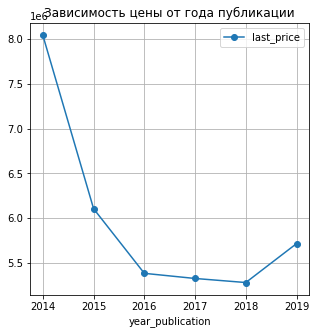

In [90]:
(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

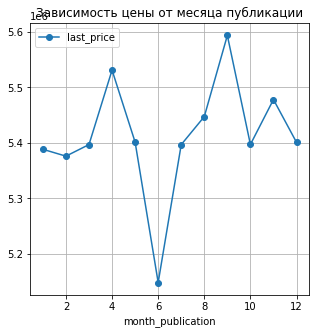

In [91]:
(
    data.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

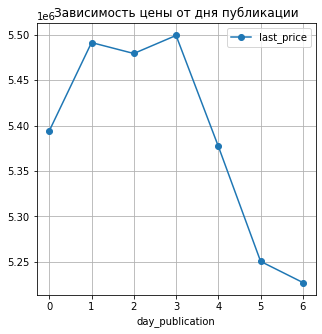

In [92]:
(
    data.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

Четкой зависимости между датой публикации и стоимостью квартиры не обнаружено.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Предполагается, что в Санкт-Петербурге стоимость жилья выше, чем в окрестностях. 
Наименьшая - в отдаленных, новых или неблагополучных районах.
Проверим гипотезу:

In [93]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
санкт-петербург,14869,108645.631797
мурино,562,85443.035730
кудрово,451,95150.960355
шушары,436,78405.738532
всеволожск,391,67155.598542
пушкин,359,101867.482591
колпино,337,75333.295816
парголово,322,90448.423416
гатчина,307,68746.146515


In [94]:
#максимальная стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,14869,108645.631797


Гипотеза с наиболее высокой стоимостью в Санкт-Петербурге подтвердилась.

In [95]:
#минимальная стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
выборг,237,58141.909325


Наименьшая стоимость жилья в Выборге, что достаточно далеко от Санкт-Петербурга.

/tmp/ipykernel_48/3497570049.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=locality_pivot_table.index, rotation=45, ha='right')


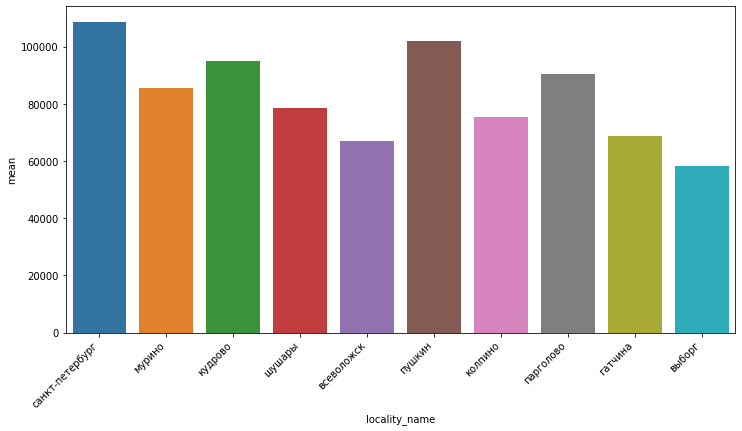

In [103]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_xticklabels(labels=locality_pivot_table.index, rotation=45, ha='right')
fig = sns.barplot(x=locality_pivot_table.index, y="mean", data=locality_pivot_table, ci = None, ax=ax)

#### Средняя стоимость на разном удалении от центра

Сперва надо определить какая область считается центром.

In [ ]:
data.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

In [ ]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()

In [ ]:
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
data.query('locality_name == "санкт-петербург" and distance_city_center<10').pivot_table(values='last_price', index='distance_city_center')

Наблюдается зависимость - цена падает при удалении от центра.
Резкое изменение цены квартиры имеет место быть на удалении 9 км от центра города. 
На большем удалении стоимость примерно не меняется.

### Напишите общий вывод

Изучена общая информация о данных - обработаны пропущенные значения там, где это необходимо, заменены типы данных на необходимые для возможности исследования. Добавлены характеристики:
<br> - цена одного квадратного метра
<br> - день недели публикации объявления
<br> - месяц публикации объявления
<br> - год публикации объявления
<br> - тип этажа квартиры
<br> - расстояние до центра города в километрах
<br> Изучены параметры на наличие выбивающихся значений. Были определены и исключены аномалии в данных с ценой объекта, общей площадью квартиры, количеством комнат и высотой потолков.
<br> Ошибки могут быть вызваны человеческим фактором, несовершенством формы для заполнения данных без проверки данных.
<br>Выявлено, что в большинстве случаев продаются 2-3 комнатные квартиры , со средней стоимостью в 100 т.р. за кв.метр. и высотой потолков 2,65м.
<br>При помощи диаграммы размаха выявлено, что нормальные значения времени продажи квартир варьируются от 1 до 430 дней. Быстрой считается продажа до 50 дней, долгой - более 200.
<br>Люди  стараются найти предложения квартир на любом этаже за исключением первого и последнего. 
<br>При удалении от центра, падает и стоимость квартиры. 
<br>В Петербурге они дороже, чем в области. Как показал анализ, самые дешевые квартиры - в Выборге.
<br>Наиболее явными факторами зависимости стоимости является общая площадь и расположение. Больше площадь- больше и цена, ближе к центру Санкту-Петербурга - дорогие варианты квартир.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.